## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import array

## Read Dataset

In [ ]:
df = pd.read_csv('/content/fake_or_real_news.csv')
df.fillna(' ')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df["title"]=df["title"].str.lower()
df["text"]=df["text"].str.lower()
df["label"]=df["label"].str.lower()

# Pre-Process

In [ ]:
# remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
df['title'] = df['title'].apply(lambda x: re.sub('[^\w\s]', ' ', x))

In [ ]:
# remove one and two character words
df['text'] = df['text'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))

In [ ]:
# remove numerical values
df['text'] = df['text'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'[0-9]+', '', x))

In [ ]:
# \s+ means all empty space (\n, \r, \t)
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))
df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x))

In [ ]:
labels = df.label
labels.head()

0    fake
1    fake
2    real
3    fake
4    real
Name: label, dtype: object

# Split Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=5)

# TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

# Fit, and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Model

In [ ]:
# Initialize a PassiveAggressiveClassifier
start = timeit.default_timer()
pac=PassiveAggressiveClassifier(early_stopping= True, verbose=1)
pac.fit(tfidf_train,y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)
stop = timeit.default_timer()
print('Time: ', stop - start)  

-- Epoch 1
Norm: 37.88, NNZs: 44025, Bias: -0.603688, T: 4539, Avg. loss: 0.310081
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.84, NNZs: 44630, Bias: -0.567750, T: 9078, Avg. loss: 0.076784
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 46.47, NNZs: 44941, Bias: -0.560276, T: 13617, Avg. loss: 0.031620
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 47.78, NNZs: 45079, Bias: -0.546538, T: 18156, Avg. loss: 0.015554
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 48.35, NNZs: 45098, Bias: -0.542793, T: 22695, Avg. loss: 0.007780
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 48.63, NNZs: 45098, Bias: -0.547133, T: 27234, Avg. loss: 0.004734
Total training time: 0.10 seconds.
Convergence after 6 epochs took 0.10 seconds
Time:  0.12746609800160513


In [ ]:
# fit the training dataset on the NB classifier
# from sklearn.naive_bayes import MultinomialNB
start1 = timeit.default_timer()
Naive = MultinomialNB()
Naive.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(tfidf_test)
stop1 = timeit.default_timer()
print('Time: ', stop1 - start1)  

Time:  0.035514399998646695


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
start2 = timeit.default_timer()
SVM = svm.SVC()
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
stop2 = timeit.default_timer()
print('Time: ', stop2 - start2)  

Time:  61.561791978001565


# Evaluation Passive Agrresive

In [ ]:
score_pac = accuracy_score(y_test,y_pred)
acc1=round(score_pac*100,2)
print(f'Passive Aggresive Classifier Accuracy: {round(score_pac*100,2)}%')
time_pa=stop-start
print('Time elapsed: ', stop - start)  

Passive Aggresive Classifier Accuracy: 94.24%
Time elapsed:  0.12746609800160513


In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[604  33]
 [ 40 590]]


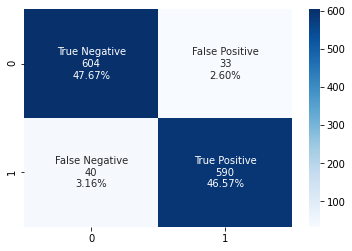

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

# Evaluation NB

In [ ]:
score_pac1 = accuracy_score(y_test,predictions_NB)
acc2=round(score_pac1*100,2)
print(f'Naive Bayes: {round(score_pac1*100,2)}%')
time_nb=stop1-start1
print('Time elapsed: ', time_nb)  

Naive Bayes: 82.64%
Time elapsed:  0.035514399998646695


In [ ]:
matrix1 = confusion_matrix(y_test,predictions_NB)
print (matrix1)

[[432 205]
 [ 15 615]]


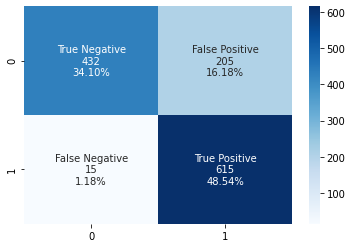

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix1.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Blues')

# Evaluation SVM

In [ ]:
score_pac2 = accuracy_score(y_test,predictions_SVM)
acc3=round(score_pac2*100,2)
print(f'svm: {round(score_pac2*100,2)}%')
time_svm=stop2-start2
print('Time elapsed: ', time_svm)  

svm: 93.21%
Time elapsed:  61.561791978001565


In [ ]:
matrix2 = confusion_matrix(y_test,predictions_SVM)
print (matrix2)

[[606  31]
 [ 55 575]]


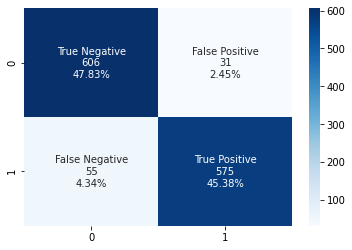

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix2.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Blues')

# TLDR

In [ ]:
list_time = [time_svm, time_nb, time_pa]
list_time.sort()
print('Sorted time ->', list_time)
print('================================================================')
print('Passive Agressive     |     Naive Bayes     |     SVM   ')
print(time_pa,'   ',time_nb,'  ',time_svm)
print('================================================================')
if (time_pa < time_nb):
  if (time_pa < time_svm):
    print('Passive Aggresive is the fastest algorithm')
if (time_nb<time_pa):
  if (time_nb<time_svm):
    print('Naive Bayes is the fastest algorithm')
elif (time_svm<time_pa):
  if (time_svm<time_nb):
    print('SVM is the fastest algorithm')
if (time_pa > time_nb):
  if (time_pa > time_svm):
    print('Passive Aggresive is the slowest algorithm')
if (time_nb>time_pa):
  if (time_nb>time_svm):
    print('Naive Bayes is the slowest algorithm')
elif (time_svm>time_pa):
  if (time_svm>time_nb):
    print('SVM is the slowest algorithm')

Sorted time -> [0.035514399998646695, 0.12746609800160513, 61.561791978001565]
Passive Agressive     |     Naive Bayes     |     SVM   
0.12746609800160513     0.035514399998646695    61.561791978001565
Naive Bayes is the fastest algorithm
SVM is the slowest algorithm


In [ ]:
list_acc = [acc1,acc2,acc3]
list_acc.sort()
print('Sorted acc ->', list_acc)
print('==================================================')
print('Passive Agressive   |   Naive Bayes   |   SVM   ')
print('    ',acc1,'%             ',+ acc2,'%       ', acc3,'%')
print('==================================================')
if (acc1 < acc2):
  if (acc1 < acc3):
    print('Passive Aggresive has the least accuracy')
if (acc2<acc1):
  if (acc2<acc3):
    print('Naive Bayes has the least accuracy')
elif (acc3<acc1):
  if (acc3<acc2):
    print('SVM has the least accuracy')
if (acc1 > acc2):
  if (acc1 > acc3):
    print('Passive Aggresive has the most accuracy')
if (acc2>acc1):
  if (acc2>acc3):
    print('Naive Bayes has the most accuracy')
elif (acc3>acc1):
  if (acc3>acc2):
    print('SVM has the most accuracy')

Sorted acc -> [82.64, 93.21, 94.24]
Passive Agressive   |   Naive Bayes   |   SVM   
     94.24 %              82.64 %        93.21 %
Naive Bayes has the least accuracy
Passive Aggresive has the most accuracy
